# Random IVM Tetrahedron Volumes

![quadrays](https://upload.wikimedia.org/wikipedia/commons/9/99/Quadray.gif)

According to a proof by Dr. Robert Gray, at one time archived on a Synergetics listserv, any tetrahedron of IVM vertexes (assuming non-coplanar) will have a whole number volume.  

His proof was actually more general than that and may have extended to points half-way between IVM centers as well.

In this Notebook, we randomly generate IVM tetrahedrons and computer their volumes.  Within the error of floating point, we demonstrate this result.

In [1]:
from tetravolume import Qvector

In [2]:
from itertools import permutations

In [3]:
combos = set()
for combo in permutations((0,1,1,2)):
    combos.add(combo)
combos = list(combos)
combos

[(0, 1, 1, 2),
 (1, 2, 0, 1),
 (0, 2, 1, 1),
 (0, 1, 2, 1),
 (2, 1, 0, 1),
 (1, 1, 2, 0),
 (1, 2, 1, 0),
 (2, 1, 1, 0),
 (1, 0, 2, 1),
 (2, 0, 1, 1),
 (1, 0, 1, 2),
 (1, 1, 0, 2)]

One frequency:

!["freq1"](freq1.png)


In [4]:
import random

def any_ball():
    # random coefficients for arbitrary choice of vectors...
    coeffs = [random.randint(0, 300) for _ in range(12)]
    vectors = ([coeffs[i] * Qvector(combos[i]) for i in range(12)])
    vector_sum = Qvector((0,0,0,0))
    for v in vectors:
        vector_sum = vector_sum + v
    return vector_sum

any_ball()

ivm_vector(a=0, b=405, c=315, d=372)

In [5]:
A,B,C,D = any_ball(), any_ball(), any_ball(), any_ball()

In [6]:
lengths = [("AB", (A-B).length()),
           ("AC", (A-C).length()),
           ("AD", (A-D).length()),
           ("BC", (B-C).length()),
           ("CD", (C-D).length()),
           ("DB", (D-B).length())]

In [7]:
lengths

[('AB', 303.67416748877406),
 ('AC', 601.656878960093),
 ('AD', 199.1808223700264),
 ('BC', 334.7730574583325),
 ('CD', 592.8313419514863),
 ('DB', 371.18863129142306)]

In [8]:
from tetravolume import Tetrahedron

In [9]:
t = Tetrahedron(*[lengths[i][1] for i in range(6)])

In [10]:
t.ivm_volume()

12393213.000000121

In [11]:
def demo():
    A,B,C,D = any_ball(), any_ball(), any_ball(), any_ball()
    lengths = [("AB", (A-B).length()),
           ("AC", (A-C).length()),
           ("AD", (A-D).length()),
           ("BC", (B-C).length()),
           ("CD", (C-D).length()),
           ("DB", (D-B).length())]
    t = Tetrahedron(*[lengths[i][1] for i in range(6)])
    return t.ivm_volume()

demo()

1386440.0

In [12]:
t.xyz_volume()

11684433.270652484

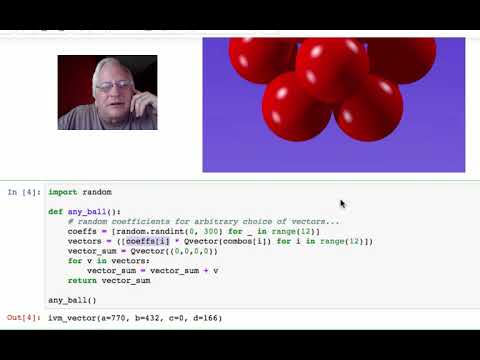

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("v8vjw3gCBgs") # https://youtu.be/v8vjw3gCBgs